In [158]:
'''
IMPORTANT NOTICE:
    TO RUN CODE PROPERLY THE FOLLOWING FILES MUST BE DOWNLOADED
            AND IN SAME DIRECTORY AS SCAM_CALLS_FINAL

        --- EXAMPLE: ALL FILES ARE IN DOWNLOADS -----
    
    --- FILES BELOW ARE USED TO RUN THIS PROGRAM ---
        1. dnc_complaint_numbers_2019-11-25.csv
        2. dnc_complaint_numbers_2019-10-21.csv
        3. dnc_complaint_numbers_2019-11-11.csv
        4. OriginalScams.csv       
        5. ModifiedScams.csv
'''
# Senior Design 2, Fall 2019 @ CCNY
# Team Member & Name: Team 5 (4 member team)

# PRAVEENA SHRESTHA 
# ABDUR RAFEY
# STANLEY WONG
# JOHN CHEN

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings
%matplotlib inline

In [160]:
train_df = pd.read_csv('dnc_complaint_numbers_2019-11-25.csv', index_col=None)
test_df = pd.read_csv('dnc_complaint_numbers_2019-10-21.csv', index_col=None)
submit1_df = pd.read_csv('dnc_complaint_numbers_2019-11-11.csv', index_col=None)


In [161]:
# Array using Consumer_States Provided
StateArray = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia',
             'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland',
             'Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey',
             'New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
             'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming',
              'Ontario, Canada','District of Columbia','Virgin Islands','Puerto Rico','Northern Mariana Islands','US Military Pacific']

# Array corresponding Consumer_State number 
CorrStateNum = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50,
                51,52,53,54,55,56
               ]

# REPLACE Consumer_State Array with Corresponding Consumer_State Number Array
train_df = train_df.replace(StateArray, CorrStateNum)
test_df = test_df.replace(StateArray, CorrStateNum)
submit1_df = submit1_df.replace(StateArray, CorrStateNum)

modifiedtrain = train_df
modifiedtest = test_df
modifiedsubmit = submit1_df


# Replace scam call strings with integers: 1 -> Yes, 0 -> No
modifiedtrain = train_df['Recorded_Message_Or_Robocall'] = train_df['Recorded_Message_Or_Robocall'].replace('Y', 1)
modifiedtrain = train_df['Recorded_Message_Or_Robocall'] = train_df['Recorded_Message_Or_Robocall'].replace('N', 0)

modifiedtest = test_df['Recorded_Message_Or_Robocall'] = test_df['Recorded_Message_Or_Robocall'].replace('Y', 1)
modifiedtest = test_df['Recorded_Message_Or_Robocall'] = test_df['Recorded_Message_Or_Robocall'].replace('N', 0)

modifiedsubmit = submit1_df['Recorded_Message_Or_Robocall'] = submit1_df['Recorded_Message_Or_Robocall'].replace('Y', 1)
modifiedsubmit = submit1_df['Recorded_Message_Or_Robocall'] = submit1_df['Recorded_Message_Or_Robocall'].replace('N', 0)

#modifiedtrain['Company_Phone_Number'].sample(20)
# remove all null values
modifiedtrain = train_df.dropna()
modifiedtest = test_df.dropna()
modifiedsubmit = submit1_df.dropna()

modifiedtrain['Consumer_State'] = modifiedtrain['Consumer_State'].astype(int)
modifiedtest['Consumer_State'] = modifiedtest['Consumer_State'].astype(int)
modifiedsubmit['Consumer_State'] = modifiedsubmit['Consumer_State'].astype(int)

# Display 20 samples
modifiedtrain.sample(20)



/Users/PJ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/PJ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/PJ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

,Company_Phone_Number,Created_Date,Violation_Date,Consumer_City,Consumer_State,Consumer_Area_Code,Subject,Recorded_Message_Or_Robocall
3004,9202995583,2019-11-22 11:13:56,2019-11-22 10:13:00,Fond du Lac,49,920,No Subject Provided,1.0
10350,6362381050,2019-11-22 15:32:32,2019-11-22 11:22:00,anchorage,2,907,Warranties & protection plans,1.0
1171,3471416678,2019-11-22 09:44:11,2019-11-19 17:10:00,Milwaukee,49,414,"Reducing your debt (credit cards, mortgage, st...",1.0
8276,5418105820,2019-11-22 14:21:43,2019-11-22 11:06:00,Yoncalla,37,541,Warranties & protection plans,1.0
20984,8133152183,2019-11-23 17:33:25,2019-10-30 11:46:00,Seffner,9,813,"Reducing your debt (credit cards, mortgage, st...",1.0
4684,4434098315,2019-11-22 12:14:31,2019-11-22 08:53:00,Cumberland,20,301,Dropped call or no message,1.0
6395,4054936259,2019-11-22 13:10:39,2019-10-16 15:24:00,GIBRALTAR,22,734,Dropped call or no message,1.0
24443,2253511029,2019-11-24 17:48:57,2019-11-22 17:10:00,Gonzales,18,225,Other,0.0
10984,9842620177,2019-11-22 15:53:24,2019-11-22 03:49:00,philadelphia,38,215,"Calls pretending to be government, businesses,...",1.0
17739,2523511942,2019-11-23 08:42:56,2019-11-23 08:39:00,Fairfax,46,910,No Subject Provided,1.0


In [162]:
new_f = modifiedtest[['Company_Phone_Number']]

new_f.to_csv("OriginalScams.csv", index=False)

In [163]:
# extract usable features
feature_cols = [ 
    'Recorded_Message_Or_Robocall',
    'Consumer_State'
]
train_features = modifiedtrain[feature_cols] 


# construct target vector, dependent variable
train_target = modifiedtrain['Consumer_Area_Code']

In [164]:
# using linear regression method
lreg = LinearRegression()
lreg.fit(train_features, train_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
test_features = modifiedtest[feature_cols] 

# construct predictions 
modifiedtest['predicted'] = lreg.predict(test_features)
print("Prediction using Linear Regression train data against Test1:")

print("Mean Squared Error for Test1 using Linear Regression:",mean_squared_error(modifiedtest['Consumer_Area_Code'], modifiedtest['predicted']))

Prediction using Linear Regression train data against Test1:
Mean Squared Error for Test1 using Linear Regression: 56433.126937125984


/Users/PJ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [166]:
#handling missing data
submit1_features = modifiedsubmit[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit1_features.sample(20)
# 1 -> Yes, 0 -> No

,Recorded_Message_Or_Robocall,Consumer_State
14277,1.0,5
15977,1.0,22
2853,1.0,17
5214,1.0,43
10852,1.0,10
11214,1.0,32
8888,1.0,37
15520,1.0,3
14303,1.0,9
12133,1.0,27


In [167]:
modifiedsubmit['Company_Phone_Number'].sample(100)

2885     8382012337
17440    8663910376
23089    8664072315
8902     8775759944
14346    4029996239
22617    3602452216
10574    9293228615
2078     6066636915
19586    9722649763
13769    3523296260
593      2602360325
5006     8179042391
10731    2293681003
7595     9544160243
7926     3463550167
15903    4702202153
24328    9524428042
9130     8324534401
26441    7162372974
1419     8888824593
24595    6198025314
21774    6300114227
10688    4062040747
14570    7263638042
93       7606979800
17853    8772805098
11824    4156620321
8101     9412532211
7677     8638548735
9585     8884718988
            ...    
12226    2056230602
14132    5043755151
4306     8479221081
14220    8007894911
9576     9549388637
2226     8772195240
25255    4242456773
12685    6193739458
8760     8314199836
12592    9852419359
10161    8337466951
23768    7037502578
23065    2102745673
8098     5161917944
2001     2092681879
25344    2023509167
10270    2242782066
5455     7707504069
1707     5077021214


In [168]:
# Write first column to csv file
new_f = master_df[['Company_Phone_Number']]

new_f.to_csv("ModifiedScams.csv", index=False)

In [169]:
# It's taking numbers from the public database
# Learning its patterns and creates a "Spam Phone Number" based on the dataset
# as well as the Consumer_Area_Code

# TESTED EACH Company_Phone_Number
    # Some phone numbers are randomly generated
    # Some already exists within the CSV file
        # But area code could be randomly generated
    # Some take a specific pattern and generates the rest of the numbers

# POSSIBILITY OF THIS DATASET
    # False Positive 
        # With these generated Phone Numbers and Area Codes
        # We can have our system compare to see if its a 1 or 0
            # 1 = YES scam , 0 = NO scam


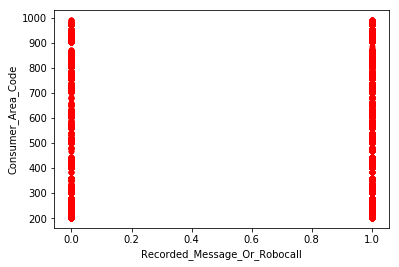

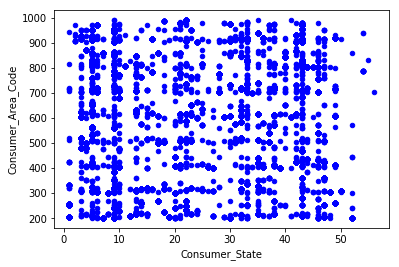

In [170]:
# Scatter plots of different features for test2 data: 

modifiedsubmit.plot(kind='scatter',x='Recorded_Message_Or_Robocall',y='Consumer_Area_Code',color='red')
plt.show()

modifiedsubmit.plot(kind='scatter',x='Consumer_State',y='Consumer_Area_Code',color='blue')
plt.show()


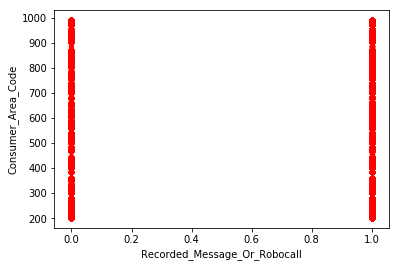

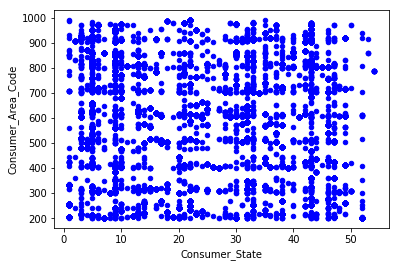

In [171]:
# Scatter plots of different features for training data: 

master_df.plot(kind='scatter',x='Recorded_Message_Or_Robocall',y='Consumer_Area_Code',color='red')
plt.show()

master_df.plot(kind='scatter',x='Consumer_State',y='Consumer_Area_Code',color='blue')
plt.show()


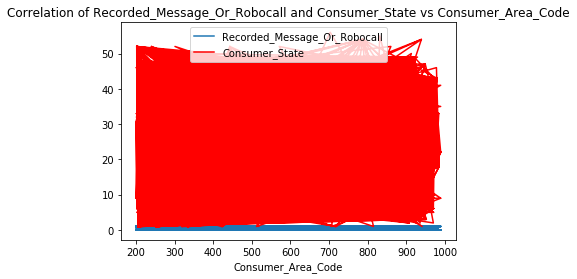

In [172]:
ax = plt.gca()
modifiedsubmit.plot(kind='line',x='Consumer_Area_Code',y='Recorded_Message_Or_Robocall',title='Correlation of Recorded_Message_Or_Robocall and Consumer_State vs Consumer_Area_Code',ax=ax)
modifiedsubmit.plot(kind='line',x='Consumer_Area_Code',y='Consumer_State', color='red', ax=ax)
plt.show()

In [173]:
#OLS Regression Results for Testing2 Data
# Add a constant to our existing dataframe for modeling purposes
modifiedsubmit = sm.add_constant(modifiedsubmit)

est = sm.OLS(modifiedsubmit['Consumer_Area_Code'], 
             submit1_features[['Recorded_Message_Or_Robocall', 'Consumer_State']]
            ).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     Consumer_Area_Code   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                 2.080e+04
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:45:55   Log-Likelihood:            -1.1512e+05
No. Observations:               15934   AIC:                         2.302e+05
Df Residuals:                   15932   BIC:                         2.303e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Recorded_Message

In [174]:
#OLS Regression Results for Training Data
# Add a constant to our existing dataframe for modeling purposes
master_df = sm.add_constant(master_df)

est = sm.OLS(master_df['Consumer_Area_Code'], 
             master_features[['Recorded_Message_Or_Robocall', 'Consumer_State']]
            ).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     Consumer_Area_Code   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                 3.724e+04
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:45:56   Log-Likelihood:            -2.0682e+05
No. Observations:               28568   AIC:                         4.136e+05
Df Residuals:                   28566   BIC:                         4.137e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Recorded_Message

In [175]:
# Reading csv files -> OriginalScams.csv contains Company_Phone_Number sourced from FTC site
# Reading csv files -> ModifiedScams.csv contains Company_Phone_Number sourced from newly generated numbers
original = pd.read_csv('OriginalScams.csv')
newGen = pd.read_csv('ModifiedScams.csv')

'''
Test to see samples
---------------------
original['Company_Phone_Number'].sample(20)
newGen['Company_Phone_Number'].sample(20)
'''

# Create a dataframe to see if newGen values exsists in original
dataframes = newGen.assign(Inoriginal=newGen.Company_Phone_Number.isin(original.Company_Phone_Number))

# Set values to see if InOriginal column is 1 or 0 
numberInTrainingSet = dataframes[dataframes['Inoriginal'] == 1]
numberNotInTrainingSet = dataframes[dataframes['Inoriginal'] == 0]

# print the values of counted True's/ False's -> exists or does not exists
print("Total amount of numbers in dataset:\n", len(dataframes), end="")
print("Amount of numbers generated in original training set:\n", numberInTrainingSet.count())
print("Amount of numbers generated not in original training set:\n", numberNotInTrainingSet.count())

# Defining Variables
Total = len(dataframes)
InOriginalSet = numberInTrainingSet.count()
NotInOriginalSet = numberNotInTrainingSet.count()

# print the percentage values of Company_Phone_Numbers that exists in the original from our newly generated values
print("Percentage in original training set: ", (InOriginalSet / Total) * 100)
print("Percentage not in original training set: ", (NotInOriginalSet / Total) * 100)



Total amount of numbers in dataset:
 28568Amount of numbers generated in original training set:
 Company_Phone_Number    14708
Inoriginal              14708
dtype: int64
Amount of numbers generated not in original training set:
 Company_Phone_Number    13860
Inoriginal              13860
dtype: int64
Percentage in original training set:  Company_Phone_Number    51.484178
Inoriginal              51.484178
dtype: float64
Percentage not in original training set:  Company_Phone_Number    48.515822
Inoriginal              48.515822
dtype: float64
